In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/davoodwadi/MLCourse/davoodwadi.github.io/code':
  os.chdir(r'/Users/davoodwadi/MLCourse/davoodwadi.github.io/code')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_44976/4123388575.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/davoodwadi/mambaforge/lib/python3.10/importlib/_bootstrap.py": 1687560475.899881, "/Users/davoodwadi/mambaforge/lib/python3.10/importlib/_bootstrap_external.py": 1687560475.905339, "/Users/davoodwadi/mambaforge/lib/python3.10/codecs.py": 1687560473.470777, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/aliases.py": 1687560474.989399, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/__init__.py": 1687560474.985129, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/utf_8.py": 1687560475.43757, "/Users/davoodwadi/mambaforge/lib/python3.10/abc.py": 1687560473.346976, "/Users/davoodwadi/mambaforge/lib/python3.10/io.py": 1687560473.627098, "/Users/davoodwadi/mambaforge/lib/python3.10/stat.py": 1687560473.825673, "/Users/davoodwadi/mambaforge/lib/python3.10/_collections_abc.py": 1687560473.307906, "/Users/davoodwadi/mambaforge/lib/python3.10/genericpath.py": 1687560473.574852, "/Users/davoodwadi/mambaforge/lib/python3.10/posixpath.py": 1687560473.717288, "/Users/da

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
from sklearn.datasets import make_classification

np.random.seed(0)
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

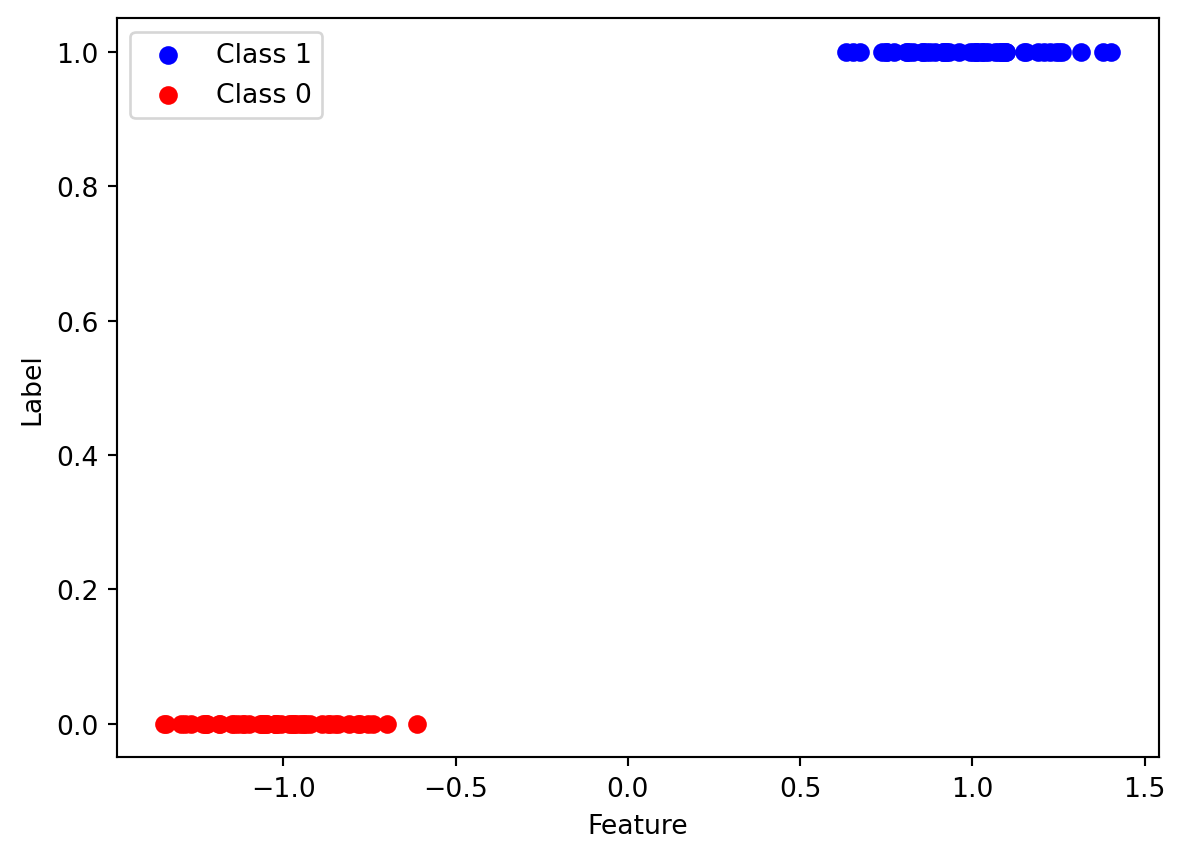

In [4]:
plt.scatter(X[y == 1], y[y == 1], color='b', label='Class 1')
plt.scatter(X[y == 0], y[y == 0], color='r', label='Class 0')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend()
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm = SVC(kernel='linear')

# Train the SVM classifier
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy: ", accuracy)

Accuracy:  1.0


[[-2.34566071e+00]
 [-2.34090688e+00]
 [-2.33615304e+00]
 [-2.33139921e+00]
 [-2.32664538e+00]
 [-2.32189154e+00]
 [-2.31713771e+00]
 [-2.31238387e+00]
 [-2.30763004e+00]
 [-2.30287620e+00]
 [-2.29812237e+00]
 [-2.29336854e+00]
 [-2.28861470e+00]
 [-2.28386087e+00]
 [-2.27910703e+00]
 [-2.27435320e+00]
 [-2.26959937e+00]
 [-2.26484553e+00]
 [-2.26009170e+00]
 [-2.25533786e+00]
 [-2.25058403e+00]
 [-2.24583020e+00]
 [-2.24107636e+00]
 [-2.23632253e+00]
 [-2.23156869e+00]
 [-2.22681486e+00]
 [-2.22206103e+00]
 [-2.21730719e+00]
 [-2.21255336e+00]
 [-2.20779952e+00]
 [-2.20304569e+00]
 [-2.19829186e+00]
 [-2.19353802e+00]
 [-2.18878419e+00]
 [-2.18403035e+00]
 [-2.17927652e+00]
 [-2.17452269e+00]
 [-2.16976885e+00]
 [-2.16501502e+00]
 [-2.16026118e+00]
 [-2.15550735e+00]
 [-2.15075352e+00]
 [-2.14599968e+00]
 [-2.14124585e+00]
 [-2.13649201e+00]
 [-2.13173818e+00]
 [-2.12698435e+00]
 [-2.12223051e+00]
 [-2.11747668e+00]
 [-2.11272284e+00]
 [-2.10796901e+00]
 [-2.10321518e+00]
 [-2.0984613

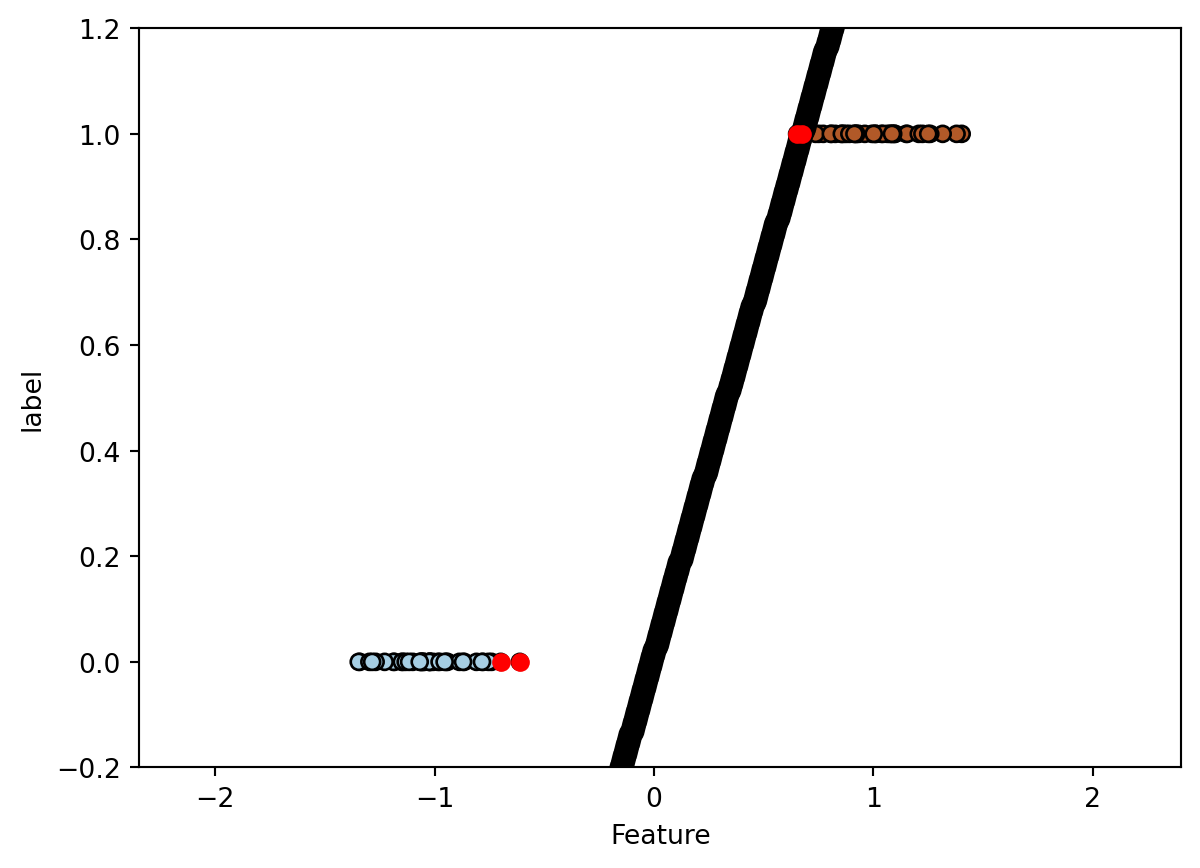

In [7]:
def plot_decision_boundary(classifier, X, y):
    # Define the range of x values for the mesh grid
    x_min, x_max = X.min() - 1, X.max() + 1

    # Create a mesh grid
    xx = np.linspace(x_min, x_max, 1000)[:, np.newaxis]

    # Use the classifier to make predictions on the mesh grid
    yy = classifier.decision_function(xx)
    print(xx, yy)

    # get support vectors
    i_sv = classifier.support_
    sv_x = X[i_sv]
    sv_y = y[i_sv]
    print(f'Support vectors are: \nX={sv_x}\ny={sv_y}')

    # Plot the decision boundary and support vectors
    plt.scatter(X, y, c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.scatter(xx, yy, color='black', linewidth=3)
    plt.scatter(sv_x,sv_y, color='red')
    plt.xlim(x_min, x_max)
    plt.ylim(-0.2, 1.2)
    plt.xlabel('Feature')
    plt.ylabel('label')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(svm, X_train, y_train)